In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# **1.1 Euclidean Distance**

In [ ]:
digits = load_digits ()
print (digits . keys ())
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]
print (data.dtype)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
float64


In [ ]:
def dist_vec(training, test):
  dist_mat = np.zeros([len(training), len(test)])
  trans_test = test.T
  mult_sets = -2 * (training @ trans_test)
  train_arr = np.sum(np.full((training.shape), np.square(training)), axis=1)
  test_arr = np.sum(np.full((test.shape), np.square(test)), axis=1)
  train_arr = np.resize(train_arr, mult_sets.T.shape).T
  test_arr = np.resize(test_arr, mult_sets.shape)
  dist_mat = np.sqrt(train_arr + test_arr + mult_sets)
  return dist_mat

In [ ]:
diss_matrix = dist_vec(data, data)
sorted_diss_mat = np.zeros(diss_matrix.shape)
for i in range(len(diss_matrix)):
  sorted_diss_mat[i, :] = np.argsort(diss_matrix[i, :])

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
print(sorted_diss_mat[4, :10])

[   4. 1777.  100. 1735. 1244. 1351. 1198.   97. 1754. 1788.]


In [ ]:
plt.gray()
plt.imshow(images[100])
plt.show

In [ ]:
positives = np.zeros((len(sorted_diss_mat), 200 - 2))
for N in range(1, 200):
  label_check = np.zeros((len(sorted_diss_mat), N), dtype=int)
  if (N % 20 == 0):
    print(N)
  for i in range(len(sorted_diss_mat)):
    count = 0
    for m in range(N):
      label_check[i, m] = target[int(sorted_diss_mat[i, m])]
    for j in range(1, N):
      if label_check[i, 0] == label_check[i, j]:
        count += 1
    positives[i, N-2] = count

In [ ]:
#unnecessary
total_pos = np.zeros(len(sorted_diss_mat))
for i in range(len(sorted_diss_mat)):
  total_pos[i] = np.sum(positives[i, :])

In [ ]:
N = 200
precision_mat = np.zeros((len(sorted_diss_mat), N-2))
for i in range(len(sorted_diss_mat)):
  for m in range(N-2):
    precision_mat[i, m] = positives[i, m] / (positives[i, m] + (m+1) - positives[i, m])

In [ ]:
N = 200
recall_mat = np.zeros((len(sorted_diss_mat), N-2))
for i in range(len(sorted_diss_mat)):
  for m in range(N-2):
    recall_mat[i, m] = positives[i, m] / positives[i, N-3] #total_pos[i]

In [ ]:
def prec_recall(N, recall_mat, precision_mat, target):
  precision_k = []
  recall_k = []
  for k in range(10):
    precision_k.append(precision_mat[np.argwhere(target == k)])
    recall_k.append(recall_mat[np.argwhere(target == k)])
  recall_k = np.array(recall_k)
  precision_k = np.array(precision_k)

  precision_avg = np.zeros((10, N-2))
  recall_avg = np.zeros((10, N-2))
  for k in range(10):
    precision_k[k] = precision_k[k].reshape(-1, N-2)
    precision_avg[k, :] = np.mean(precision_k[k], axis=0)
    recall_k[k] = recall_k[k].reshape(-1, N-2)
    recall_avg[k, :] = np.mean(recall_k[k], axis=0)
  return recall_avg, precision_avg

In [ ]:
recall_avg, precision_avg = prec_recall(N=200, recall_mat=recall_mat, precision_mat=precision_mat, target=target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
def plotting(recall_avg, precision_avg):
  fig, ax = plt.subplots(5, 2)
  count = -1
  for j in range(5):
    for i in range(2):
      count += 1
      ax[j, i].plot(recall_avg[count, :], precision_avg[count, :], color='purple')

    #add axis labels to plot
      ax[j, i].set_title('Precision-Recall Curve for')
      ax[j, i].set_ylabel('Precision')
      ax[j, i].set_xlabel('Recall')

  #display plot
  plt.show()

  for k in range(10):
    int_ready = []
    for i in range(len(recall_avg[0])):
      int_ready.append([recall_avg[k, i], precision_avg[k, i]])

    check1 = np.trapz(int_ready, dx=1/200)
    auc = sum(check1) + 1/200
    print('Area under curve={} for k={}'.format(auc, k))

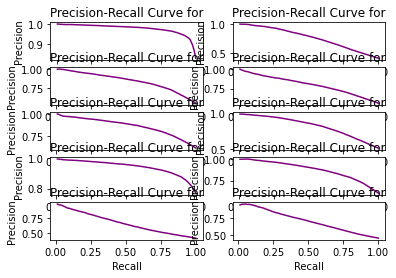

Area under curve=0.7668587145755931 for k=0
Area under curve=0.6615794431062129 for k=1
Area under curve=0.7083068981395275 for k=2
Area under curve=0.6802358614900705 for k=3
Area under curve=0.7164044768619319 for k=4
Area under curve=0.6938636606928817 for k=5
Area under curve=0.7516985786609741 for k=6
Area under curve=0.7230514376164114 for k=7
Area under curve=0.6083986004624081 for k=8
Area under curve=0.6312713673051572 for k=9


In [ ]:
plotting(recall_avg=recall_avg, precision_avg=precision_avg)

In [ ]:
precision_gain = np.ones(precision_mat.shape)
recall_gain = np.ones(recall_mat.shape)
N = 200
for i in range(len(precision_mat)):
  for m in range(N-2):
    precision_gain[i, m] = np.max([0, (N/positives[i, N-3] - 1/precision_mat[i, m]) / (N/positives[i, N-3] - 1)])
    recall_gain[i, m] = np.max([0, (N/positives[i, N-3] - 1/recall_mat[i, m]) / (N/positives[i, N-3] - 1)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


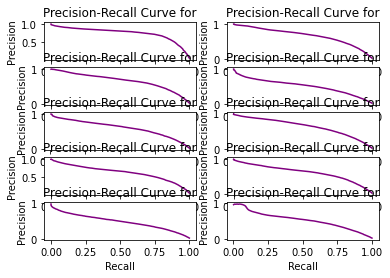

Area under curve=0.5355807964722884 for k=0
Area under curve=0.5765976021931428 for k=1
Area under curve=0.5645877417855086 for k=2
Area under curve=0.49589040852752375 for k=3
Area under curve=0.5320076290919472 for k=4
Area under curve=0.5522958863729815 for k=5
Area under curve=0.5175459421836489 for k=6
Area under curve=0.5365221633999444 for k=7
Area under curve=0.49373068860727026 for k=8
Area under curve=0.5095486254770974 for k=9


In [ ]:
recall_gain_avg, precision_gain_avg = prec_recall(N=200, recall_mat=recall_gain, precision_mat=precision_gain, target=target)
plotting(recall_avg=recall_gain_avg, precision_avg=precision_gain_avg)

PrecisionGain and RecallGain gave worse results than the precision and recall. The numbers 8, 9, 4 are difficult to distinguish however 0, 6, and 7 gave the best results to distinguish in the precision and recall. It is difficult to compare the AUC between numbers because they are close to each other

# **2.1 Loading and Cleaning the Data**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
file = os.path.join('data','/content/gdrive/My Drive/CrowdstormingDataJuly1st.csv') 
df = pd.read_csv(file)

In [ ]:
print(df.axes[1])

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')


In [ ]:
df_cleaned = df.dropna(subset=['photoID'])
df_cleaned = df_cleaned.assign(skin_avg=df.loc[:, ["rater1", "rater2"]].mean(axis=1))
df_cleaned = df_cleaned.assign(all_reds=df.loc[:, ["yellowReds", "redCards"]].sum(axis=1))
df_cleaned = df_cleaned.groupby(["playerShort",'skin_avg'], as_index=False).sum()

dataset = df_cleaned
dataset["red_per_game"] = (df_cleaned.loc[:,'all_reds']) / df_cleaned.loc[:, 'games']
dataset = df_cleaned.loc[:,['skin_avg','red_per_game','refNum']]

In [ ]:
print("Shape of dataset after dropping irrelevant features:", df_cleaned.axes[1], dataset.shape)

Shape of dataset after dropping irrelevant features: Index(['playerShort', 'skin_avg', 'height', 'weight', 'games', 'victories',
       'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards',
       'rater1', 'rater2', 'refNum', 'refCountry', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'all_reds', 'red_per_game'],
      dtype='object') (1585, 3)


*   Dataset's README.txt file explaines all the feature names.
*   We only need referee numbers, skin colour rates and number of red cards that each player have seen. Since the main task is finding the relation between players' skin color and red cards we considered irrelevant all features except these two.
*   Total number of red cards data was missing and we computed by summing redCards and yellowReds
*   There are approximately 500 missing data, we excluded those players' data from the dataset that we used for our models.
*   Raters are mostly gave similar answers but in order not to have a bias we took the mean values of raters' guess.
*   No, we considered every possible referee. If number of appereance is related to the objectiveness of the refereee then we should exclude them but dataset does not mention such information.
*   Yes, they should. For each player, we calculate an average probability of getting a red card from different referees.

# **2.2 Model Creation**

In [4]:
# base classes

class Node:
    pass

class Tree:
    def __init__(self):
        self.root = Node()
    
    def find_leaf(self, x):
        node = self.root
        while hasattr(node, "feature"):
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

In [5]:
class DecisionTree(Tree):
    def __init__(self):
        super(DecisionTree, self).__init__()
        
    def train(self, data, labels, n_min=20):
        '''
        data: the feature matrix for all digits
        labels: the corresponding ground-truth responses
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
        D_try = int(np.sqrt(D)) # how many features to consider for each split decision

        # initialize the root node
        self.root.data = data
        self.root.labels = labels
        
        #put root in stack
        stack = [self.root]
        while len(stack):
            node = stack.pop()
            n = node.data.shape[0] # number of instances in present node
            if n >= n_min:
                # Call 'make_decision_split_node()' with 'D_try' randomly selected 
                # feature indices. This turns 'node' into a split node
                # and returns the two children, which must be placed on the 'stack'.
                
                perm = np.random.permutation(D)   # permute D indices
                left, right = make_decision_split_node(node, perm[:D_try]) #select :D_try of permuted indices
                                                       #for 'make_decision_split_node()'
                # put children in stack
                stack.append(left)
                stack.append(right)
            else:
                # Call 'make_decision_leaf_node()' to turn 'node' into a leaf node.
                make_decision_leaf_node(node)
                
    def predict(self, x):
        leaf = self.find_leaf(x)
        # compute p(y | x)
        return leaf.response

In [6]:
def make_decision_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature 
                     indices to be considered in the present split
    '''
    n, D = node.data.shape

    # find best feature j (among 'feature_indices') and best threshold t for the split
    e_min = 1e100
    j_min, t_min = 0, 0
    for j in feature_indices:
        # remove duplicate features
        dj = np.sort(np.unique(node.data[:,j]))
        # compute candidate thresholds in the middle between consecutive feature values
        tj = 0.5 * (dj[1:] + dj[:-1]) 
        # each candidate threshold we need to compute Gini impurities of the resulting children node
        for t in tj:
            left_indices = node.data[:,j] <= t
            nl = np.sum(left_indices)
            ll = node.labels[left_indices]
            #el = nl * (1 - np.sum(np.square(np.bincount(ll)/nl)))
            el = ((ll - ll.mean())**2).sum()
            nr = n - nl
            lr = node.labels[node.data[:,j] > t]
            #er = nr * (1 - np.sum(np.square(np.bincount(lr)/nr)))
            er = ((lr - lr.mean())**2).sum()
            # choose the the best threshold that minimizes sum of Gini impurities
            if el + er < e_min:
                e_min = el + er
                j_min = j
                t_min = t


    # create children
    left = Node()
    right = Node()
    
    # initialize 'left' and 'right' with the data subsets and labels
    # according to the optimal split found above
    left.data = node.data[node.data[:,j_min] <= t_min, :]
    left.labels = node.labels[node.data[:,j_min] <= t_min]
    right.data = node.data[node.data[:,j_min] > t_min, :]
    right.labels = node.labels[node.data[:,j_min] > t_min]

    # turn the current 'node' into a split node
    # (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min

    # return the children (to be placed on the stack)
    return left, right

In [7]:
def make_decision_leaf_node(node):
    '''
    node: the node to become a leaf
    '''
    node.N = node.labels.shape[0]
    node.response = np.mean(node.labels)

In [8]:
class LinearRegression:
    def __init__(self):
        self.beta = None
        self.b = None
      
    def train(self, input, output):
        N, D = input.shape
        output = output.reshape((N, 1))

        mean_input = np.mean(input, axis=0)
        mean_output = np.mean(output, axis=0)

        SS_xy = np.sum(output*input) - N*mean_output*mean_input
        SS_xx = np.sum(input*input) - N*mean_input @ mean_input
    
        self.beta = SS_xy / SS_xx
        self.b = mean_output - self.beta @ mean_input

        #self.beta = ( np.mean(data * labels, axis=0) - m_x * m_y ) / ( np.mean(np.sum(data**2, axis=1), axis=0) - np.dot(m_x, m_x) )
        #self.b = m_y - np.dot(self.beta, m_x)

        return self.beta, self.b


    def predict(self, input):
        return input @ self.beta + self.b

In [9]:
class RegressionForest():
    def __init__(self, n_trees=10):
        self.trees = [DecisionTree() for i in range(n_trees)]
    
    def train(self, data, labels, n_min=10):
        for tree in self.trees:
            bootstrap = np.random.choice(len(data), size=len(data))
            tree.train(data[bootstrap], labels[bootstrap], n_min)

    def predict(self, x):
        return np.mean([tree.predict(x) for tree in self.trees], axis=0)

In [10]:
def cross_validate(k_fold, data, labels):
    N, D = data.shape
    linear_regression = LinearRegression()
    regression_forest = RegressionForest()

    results = []
    linear_err = []
    forest_err = []

    input_folds = np.array_split(data, k_fold)
    output_folds = np.array_split(labels, k_fold)

    for k in range(k_fold):
        train_input_fold = np.concatenate([input_folds[i] for i in range(k_fold) if i != k])
        test_input_fold = input_folds[k]
        train_output_fold = np.concatenate([output_folds[i] for i in range(k_fold) if i != k])
        test_output_fold = output_folds[k]

        # linear regression
        beta, b = linear_regression.train(train_input_fold, train_output_fold)
        results_linear = linear_regression.predict(test_input_fold)
        linear_err.append(np.sum(np.square(results_linear - test_output_fold)))

        # regression forest
        regression_forest.train(train_input_fold, train_output_fold)
        results_forest = np.zeros(len(test_input_fold[:,0]))
        for i in range(len(test_input_fold[:,0])):
            results_forest[i] = regression_forest.predict(test_input_fold[i,:])
        forest_err.append(np.sum(np.square((results_forest - test_output_fold)[np.isfinite(results_forest)])))

    results.append(np.array([[np.mean(linear_err), np.std(linear_err)], [np.mean(forest_err), np.std(forest_err)]]))

    return results[0]

In [ ]:
data = np.atleast_2d(dataset[["skin_avg","refNum"]])
labels = np.atleast_2d(dataset["red_per_game"]).reshape((len(data)))
k = 10
errors = cross_validate(k, data, labels)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


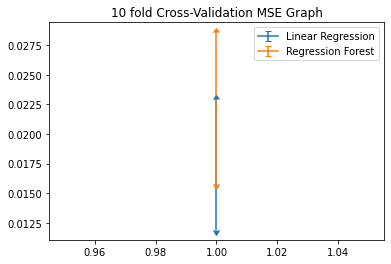

In [ ]:
errors_linear = []
errors_forest = []
stds_linear = []
stds_forest = []

errors_linear.append(errors[0][0])
errors_forest.append(errors[1][0])
stds_linear.append(errors[0][1])
stds_forest.append(errors[1][1])


plt.errorbar(1, errors_linear, yerr=stds_linear, lolims=True, uplims=True, label='Linear Regression')
plt.errorbar(1, errors_forest, yerr=stds_forest, lolims=True, uplims=True, label='Regression Forest')
plt.title("10 fold Cross-Validation MSE Graph")
plt.legend()
plt.show()

As it can be seen from the above plot, Linear Regression gave slightly better result than Regression Forest.

# **2.3 Answering the Research Question**

In [11]:
def permutation_test(k_fold, data, labels, perm):
    new_train = np.full((perm, len(data), len(data[0])), data)
    skin_col = data[:,0]

    for i in range(perm):
        np.random.shuffle(skin_col)
        new_train[i,:,0] = skin_col
    
    test_error = np.zeros((perm, 2, 2))
    for i in range(perm):
        test_error[i] = cross_validate(k_fold, new_train[i], labels)
    
    return test_error

In [ ]:
error_with_perm = permutation_test(4, data, labels, 19)
error_no_perm = cross_validate(4, data, labels)

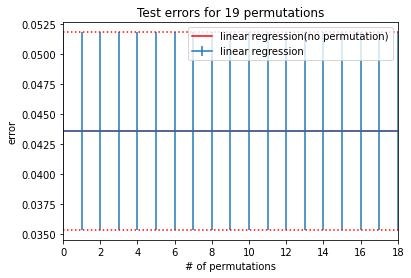

In [ ]:
n = np.arange(19)
plt.errorbar(n, error_with_perm[:,0,0], yerr=error_with_perm[:,0,1], label="linear regression")
plt.plot(n, np.full(len(n),error_no_perm[0,0]), "r", label="linear regression(no permutation)")
plt.plot(n, np.full(len(n),error_no_perm[0,0])+np.full(len(n),error_no_perm[0,1]), ':', color='r')
plt.plot(n, np.full(len(n),error_no_perm[0,0])-np.full(len(n),error_no_perm[0,1]), ':', color='r')

plt.title("Test errors for 19 permutations")
plt.ylabel("error")
plt.xlabel("# of permutations")
plt.xlim(0,18)
plt.legend()
plt.show()

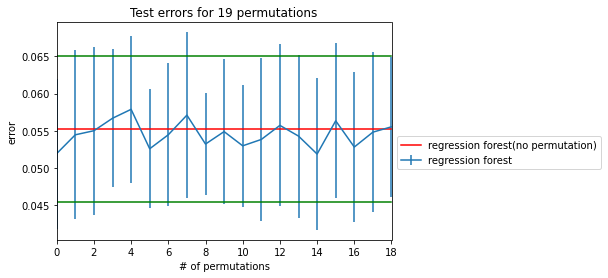

In [ ]:
plt.errorbar(n, error_with_perm[:,1,0], yerr=error_with_perm[:,1,1], label="regression forest")
plt.plot(n, np.full(len(n), error_no_perm[1,0]), "r", label="regression forest(no permutation)")
plt.plot(n, np.full(len(n), error_no_perm[1,0]) + np.full(len(n), error_no_perm[1,1]), color="g")
plt.plot(n, np.full(len(n), error_no_perm[1,0]) - np.full(len(n), error_no_perm[1,1]), color="g")

plt.title("Test errors for 19 permutations")
plt.ylabel("error")
plt.xlabel("# of permutations")
plt.xlim(0,18)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Just by looking at the linear regression model rejects the hyphothesis and by looking at the regression tree model, we can conclude that there is no correlation between skin color and number of red cards. Therefore, it is difficult to say that there is skin color bias or no bias since different models gave different results.

# **2.4 How to lie with statistics**

# **2.5 Alternative hypotheses**

Our hypotheses is the players who have large height and weight values have a relation with number of red cards. We tested our hypotheses by creating a dataset with skin_avg that we used previously, red cards per game and height/weight.

In [12]:
df_cleaned = df.dropna(subset=['photoID'])
df_cleaned = df_cleaned.assign(skin_avg=df.loc[:, ["rater1", "rater2"]].mean(axis=1))
df_cleaned = df_cleaned.assign(all_reds=df.loc[:, ["yellowReds", "redCards"]].sum(axis=1))
df_cleaned = df_cleaned.groupby(["playerShort",'skin_avg'], as_index=False).sum()

dataset = df_cleaned
dataset["red_per_game"] = (df_cleaned.loc[:,'all_reds']) / df_cleaned.loc[:, 'games']
dataset = df_cleaned.loc[:,['skin_avg','red_per_game','height']]

In [13]:
data = np.atleast_2d(dataset[["skin_avg","height"]])
labels = np.atleast_2d(dataset["red_per_game"]).reshape((len(data)))

In [ ]:
k = 10
errors = cross_validate(k, data, labels)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


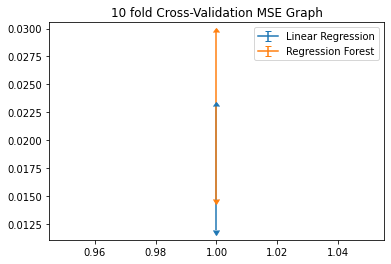

In [ ]:
errors_linear = []
errors_forest = []
stds_linear = []
stds_forest = []

errors_linear.append(errors[0][0])
errors_forest.append(errors[1][0])
stds_linear.append(errors[0][1])
stds_forest.append(errors[1][1])


plt.errorbar(1, errors_linear, yerr=stds_linear, lolims=True, uplims=True, label='Linear Regression')
plt.errorbar(1, errors_forest, yerr=stds_forest, lolims=True, uplims=True, label='Regression Forest')
plt.title("10 fold Cross-Validation MSE Graph")
plt.legend()
plt.show()

This is a similar result as in the previous task, we cannot say if our hypotheses is true or not. We also need to check the error with permutation as we did before.

In [ ]:
error_with_perm = permutation_test(10, data, labels, 3)
error_no_perm = cross_validate(10, data, labels)

In [ ]:
plt.errorbar(n, error_with_perm[:,1,0], yerr=error_with_perm[:,1,1], label="regression forest")
plt.plot(n, np.full(len(n), error_no_perm[1,0]), "r", label="regression forest(no permutation)")
plt.plot(n, np.full(len(n), error_no_perm[1,0]) + np.full(len(n), error_no_perm[1,1]), color="g")
plt.plot(n, np.full(len(n), error_no_perm[1,0]) - np.full(len(n), error_no_perm[1,1]), color="g")

plt.title("Test errors for 19 permutations")
plt.ylabel("error")
plt.xlabel("# of permutations")
plt.xlim(0,18)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

We do not know why but regression_tree took very long time in this training so we could not show any plots.